# Implementing a Logistic Regression Classifier

## 1) Installing Libraries

In [3]:
# !conda install watermark

Retrieving notices: ...working... done
Channels:
 - defaults
Platform: osx-arm64
Solving environment: failed

PackagesNotFoundError: The following packages are not available from current channels:

  - watermark

Current channels:

  - defaults

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




In [5]:
"""
%load_ext watermark
%watermark -v -p numpy, pandas, matplotlib, torch
"""

'\n%load_ext watermark\n%watermark -v -p numpy, pandas, matplotlib, torch\n'

# Loading the Dataset

In [6]:
import pandas as pd

In [7]:
df = pd.read_csv("perceptron_toydata-truncated.txt", sep = "\t")
df

,x1,x2,label
0,0.77,-1.14,0
1,-0.33,1.44,0
2,0.91,-3.07,0
3,-0.37,-1.91,0
4,-0.63,-1.53,0
5,0.39,-1.99,0
6,-0.49,-2.74,0
7,-0.68,-1.52,0
8,-0.10,-3.43,0
9,-0.05,-1.95,0


In [10]:
X_train = df[["x1", "x2"]].values
y_train = df["label"].values

In [11]:
 X_train

array([[ 0.77, -1.14],
       [-0.33,  1.44],
       [ 0.91, -3.07],
       [-0.37, -1.91],
       [-0.63, -1.53],
       [ 0.39, -1.99],
       [-0.49, -2.74],
       [-0.68, -1.52],
       [-0.1 , -3.43],
       [-0.05, -1.95],
       [ 3.88,  0.65],
       [ 0.73,  2.97],
       [ 0.83,  3.94],
       [ 1.59,  1.25],
       [ 1.14,  3.91],
       [ 1.73,  2.8 ],
       [ 1.31,  1.85],
       [ 1.56,  3.85],
       [ 1.23,  2.54],
       [ 1.33,  2.03]])

In [12]:
y_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

# Visualizing the dataset

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

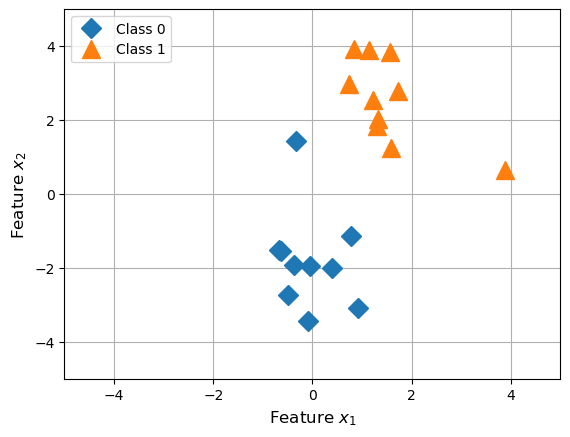

In [14]:
plt.plot(
    X_train[y_train == 0, 0],
    X_train[y_train == 0, 1],
    marker = 'D',
    markersize = 10,
    linestyle = "",
    label = 'Class 0',
)

plt.plot(
    X_train[y_train == 1, 0],
    X_train[y_train == 1, 1],
    marker = '^',
    markersize = 13,
    linestyle = "",
    label = 'Class 1',
)

plt.legend(loc = 2)

plt.xlim([-5, 5])
plt.ylim([-5, 5])

plt.xlabel("Feature $x_1$", fontsize = 12)
plt.ylabel("Feature $x_2$", fontsize = 12)

plt.grid()
plt.show()

In [15]:
X_train = (X_train - X_train.mean(axis = 0)) / X_train.std(axis = 0)

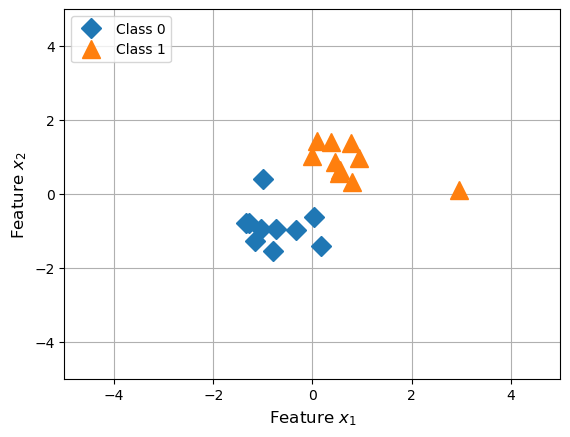

In [16]:
plt.plot(
    X_train[y_train == 0, 0],
    X_train[y_train == 0, 1],
    marker = 'D',
    markersize = 10,
    linestyle = "",
    label = 'Class 0',
)

plt.plot(
    X_train[y_train == 1, 0],
    X_train[y_train == 1, 1],
    marker = '^',
    markersize = 13,
    linestyle = "",
    label = 'Class 1',
)

plt.legend(loc = 2)

plt.xlim([-5, 5])
plt.ylim([-5, 5])

plt.xlabel("Feature $x_1$", fontsize = 12)
plt.ylabel("Feature $x_2$", fontsize = 12)

plt.grid()
plt.show()

# Implementing the Perceptron

In [19]:
import torch

In [24]:
class LogisticRegression(torch.nn.Module):
    def __init__(self, num_features):
        super().__init__()
        self.linear = torch.nn.Linear(num_features, 1)

    def forward(self, x):
        logits = self.linear(x)
        probas = torch.sigmoid(logits)
        return probas

In [25]:
torch.manual_seed(1)

model = LogisticRegression(num_features=2)

In [26]:
x = torch.tensor([1.1, 2.1])

with torch.no_grad():
    proba = model(x)

print(proba)

tensor([0.4033])


In [29]:
from torch.utils.data import Dataset, DataLoader

class MyDataset(Dataset):
    
    def __init__(self, X, y):
        self.features = torch.tensor(X, dtype = torch.float32)
        self.labels = torch.tensor(y, dtype = torch.float32)

    def __getitem__(self, index):
        x = self.features[index]
        y = self.labels[index]
        return x, y

    def __len__(self):
        return self.labels.shape[0]

train_ds = MyDataset(X_train, y_train)

train_loader = DataLoader(
    dataset = train_ds,
    batch_size = 10,
    shuffle = True,
)

# Training the Model

In [30]:
import torch.nn.functional as f

In [31]:
torch.manual_seed(1)
model = LogisticRegression(num_features = 2)
optimizer = torch.optim.SGD(model.parameters(), lr = 0.05)

num_epochs = 20

for epoch in range(num_epochs):
    model = model.train()

    for batch_idx, (features, class_labels) in enumerate(train_loader):
        probas = model(features)

        loss = f.binary_cross_entropy(probas, class_labels.view(probas.shape))

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        ### LOGGING
        print(f'Epoch: {epoch + 1: 03d} / {num_epochs: 03d}'
                f'| Batch {batch_idx: 03d} / {len(train_loader): 03d}'
                f'| Loss: {loss: .2f}')

Epoch:  01 /  20| Batch  00 /  02| Loss:  0.67
Epoch:  01 /  20| Batch  01 /  02| Loss:  0.73
Epoch:  02 /  20| Batch  00 /  02| Loss:  0.67
Epoch:  02 /  20| Batch  01 /  02| Loss:  0.67
Epoch:  03 /  20| Batch  00 /  02| Loss:  0.60
Epoch:  03 /  20| Batch  01 /  02| Loss:  0.68
Epoch:  04 /  20| Batch  00 /  02| Loss:  0.69
Epoch:  04 /  20| Batch  01 /  02| Loss:  0.54
Epoch:  05 /  20| Batch  00 /  02| Loss:  0.61
Epoch:  05 /  20| Batch  01 /  02| Loss:  0.57
Epoch:  06 /  20| Batch  00 /  02| Loss:  0.59
Epoch:  06 /  20| Batch  01 /  02| Loss:  0.54
Epoch:  07 /  20| Batch  00 /  02| Loss:  0.51
Epoch:  07 /  20| Batch  01 /  02| Loss:  0.58
Epoch:  08 /  20| Batch  00 /  02| Loss:  0.51
Epoch:  08 /  20| Batch  01 /  02| Loss:  0.54
Epoch:  09 /  20| Batch  00 /  02| Loss:  0.51
Epoch:  09 /  20| Batch  01 /  02| Loss:  0.49
Epoch:  10 /  20| Batch  00 /  02| Loss:  0.53
Epoch:  10 /  20| Batch  01 /  02| Loss:  0.44
Epoch:  11 /  20| Batch  00 /  02| Loss:  0.42
Epoch:  11 / 

# Evaluating the Result

In [32]:
probas

tensor([[0.6687],
        [0.6810],
        [0.2162],
        [0.7398],
        [0.2126],
        [0.5744],
        [0.3209],
        [0.6503],
        [0.4276],
        [0.2598]], grad_fn=<SigmoidBackward0>)

In [33]:
pred = torch.where(probas > 0.5, 1, 0)
pred

tensor([[1],
        [1],
        [0],
        [1],
        [0],
        [1],
        [0],
        [1],
        [0],
        [0]])

In [34]:
class_labels.view(pred.shape).to(pred.dtype)

tensor([[1],
        [1],
        [0],
        [1],
        [0],
        [1],
        [0],
        [1],
        [0],
        [0]])

In [37]:
def compute_accuracy(model, dataloader):
    model = model.eval()

    correct = 0.0
    total_examples = 0

    for idx, (features, class_labels) in enumerate(dataloader):
        with torch.no_grad():
            probas = model(features)
    
        pred = torch.where(probas > 0.5, 1, 0)
        lab = class_labels.view(pred.shape).to(pred.dtype)
    
        compare = lab == pred
        correct += torch.sum(compare)
        total_examples += len(compare)

    return correct / total_examples

In [38]:
train_acc = compute_accuracy(model, train_loader)

In [39]:
print(f'Accuracy: {train_acc * 100}%')

Accuracy: 100.0%


# Optional: Visualizing the decision boundary

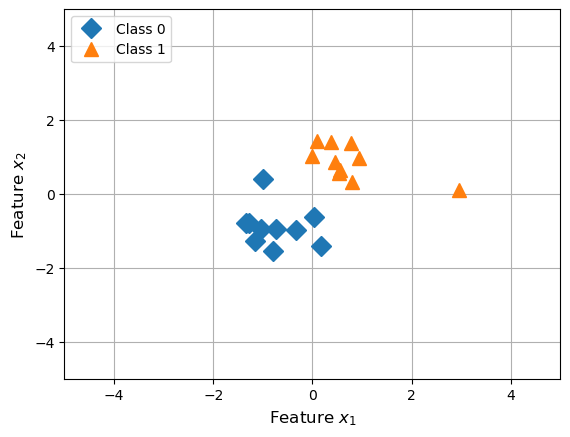

In [41]:
plt.plot(
    X_train[y_train == 0, 0],
    X_train[y_train == 0, 1],
    marker = "D",
    markersize = 10,
    linestyle = "",
    label = "Class 0",
)

plt.plot(
    X_train[y_train == 1, 0],
    X_train[y_train == 1, 1],
    marker = "^",
    markersize = 10,
    linestyle = "",
    label = "Class 1",
)

plt.legend(loc = 2)

plt.xlim([-5, 5])
plt.ylim([-5, 5])

plt.xlabel("Feature $x_1$", fontsize = 12)
plt.ylabel("Feature $x_2$", fontsize = 12)

plt.grid()
plt.show()

In [43]:
def plot_boundary(model):
    w1 = model.linear.weight[0][0].detach()
    w2 = model.linear.weight[0][1].detach()
    b = model.linear.bias[0].detach()

    x1_min = -20
    x2_min = (-(w1 * x1_min) - b) / w2
    
    x1_max = 20
    x2_max = (-(w1 * x1_max) - b) / w2

    return x1_min, x1_max, x2_min, x2_max

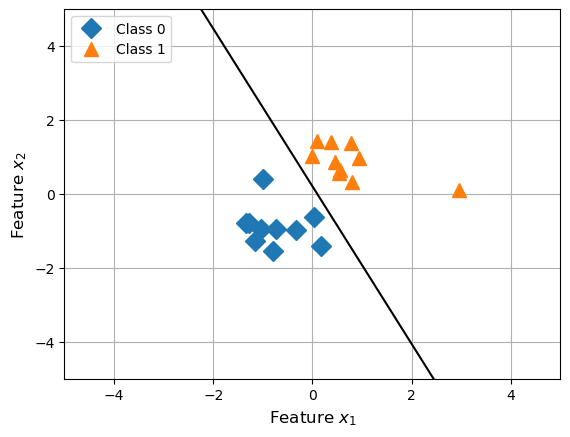

In [45]:
x1_min, x1_max, x2_min, x2_max = plot_boundary(model)

plt.plot(
    X_train[y_train == 0, 0],
    X_train[y_train == 0, 1],
    marker = "D",
    markersize = 10,
    linestyle = "",
    label = "Class 0",
)

plt.plot(
    X_train[y_train == 1, 0],
    X_train[y_train == 1, 1],
    marker = "^",
    markersize = 10,
    linestyle = "",
    label = "Class 1",
)

plt.plot([x1_min, x1_max], [x2_min, x2_max], color = 'k')

plt.legend(loc = 2)

plt.xlim([-5, 5])
plt.ylim([-5, 5])

plt.xlabel("Feature $x_1$", fontsize = 12)
plt.ylabel("Feature $x_2$", fontsize = 12)

plt.grid()
plt.show()